In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.7MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Chennai Super Kings','Rajasthan Royals'])] 
data_f = data_f.loc[data_f.team2.isin(['Chennai Super Kings','Rajasthan Royals'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
136,137,2009,Centurion,2009-04-30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
151,152,2009,Kimberley,2009-05-09,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
197,198,2010,Ahmedabad,2010-03-28,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,17,0,NV Ojha,"Sardar Patel Stadium, Motera",SS Hazare,SJA Taufel,NaN
205,206,2010,Chennai,2010-04-03,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,23,0,M Vijay,"MA Chidambaram Stadium, Chepauk",RE Koertzen,RB Tiffin,NaN
275,276,2011,Chennai,2011-05-04,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,8,MEK Hussey,"MA Chidambaram Stadium, Chepauk",SS Hazare,RB Tiffin,NaN
284,285,2011,Jaipur,2011-05-09,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,63,0,M Vijay,Sawai Mansingh Stadium,K Hariharan,SJA Taufel,NaN
333,334,2012,Chennai,2012-04-21,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,F du Plessis,"MA Chidambaram Stadium, Chepauk",Aleem Dar,BNJ Oxenford,NaN


Finally , We have got a complete dataset for all the matches of  CSK VS RR

**Let's do Q1 now**

RR Wins - 7
CSK Wins - 14


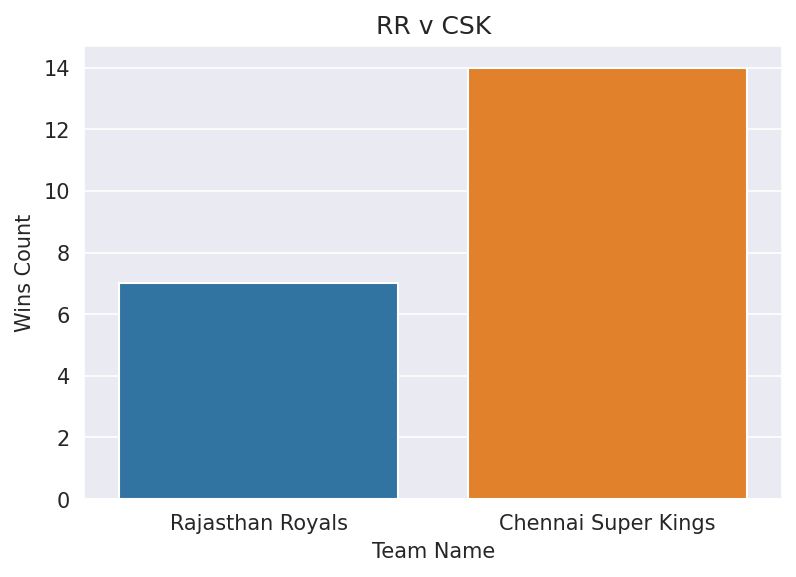

In [31]:
plt.figure(dpi=150)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('RR v CSK')
A,B =data_f.winner.value_counts()

print('RR Wins -',B)
print('CSK Wins -',A)

plt.show()


Let's support CSK as they have advantage

**Let's do Q2 now**

**Average runs scored by RR in first 6 overs v CSK**

In [12]:
data_n = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_n = data_n.loc[data.batting_team.isin(['Rajasthan Royals'])]
data_n = data_n.loc[(data_n.over <=6)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19457,83,2,Rajasthan Royals,Chennai Super Kings,1,1,GC Smith,SA Asnodkar,M Ntini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19458,83,2,Rajasthan Royals,Chennai Super Kings,1,2,GC Smith,SA Asnodkar,M Ntini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19459,83,2,Rajasthan Royals,Chennai Super Kings,1,3,GC Smith,SA Asnodkar,M Ntini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19460,83,2,Rajasthan Royals,Chennai Super Kings,1,4,GC Smith,SA Asnodkar,M Ntini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
19461,83,2,Rajasthan Royals,Chennai Super Kings,1,5,GC Smith,SA Asnodkar,M Ntini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170616,11316,1,Rajasthan Royals,Chennai Super Kings,6,2,SV Samson,SPD Smith,M Santner,0,0,0,0,0,0,0,0,0,SV Samson,caught,NaN
170617,11316,1,Rajasthan Royals,Chennai Super Kings,6,3,SPD Smith,RA Tripathi,M Santner,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170618,11316,1,Rajasthan Royals,Chennai Super Kings,6,4,RA Tripathi,SPD Smith,M Santner,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170619,11316,1,Rajasthan Royals,Chennai Super Kings,6,5,RA Tripathi,SPD Smith,M Santner,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
data_n.total_runs.sum() # Total Runs by RR in first 6 overs v CSK

957

In [14]:
data_n.match_id.nunique() # Matches of RR v CSK

21

In [15]:
np.round(957/21,2) # Average runs by RR in first 6 overs v CSK

45.57

Let's mark 40-49 there.

**For Q3, Let's find Economy rate of Chahar v RR**

In [17]:
data_c = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_c = data_c.loc[data.batting_team.isin(['Rajasthan Royals'])]
data_c = data_c.loc[data.bowler.isin(['DL Chahar'])]
data_c

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
154358,7910,2,Rajasthan Royals,Chennai Super Kings,1,1,AM Rahane,H Klaasen,DL Chahar,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN
154359,7910,2,Rajasthan Royals,Chennai Super Kings,1,2,AM Rahane,H Klaasen,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
154360,7910,2,Rajasthan Royals,Chennai Super Kings,1,3,H Klaasen,AM Rahane,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
154361,7910,2,Rajasthan Royals,Chennai Super Kings,1,4,H Klaasen,AM Rahane,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
154362,7910,2,Rajasthan Royals,Chennai Super Kings,1,5,AM Rahane,H Klaasen,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170695,11316,1,Rajasthan Royals,Chennai Super Kings,19,2,BA Stokes,J Archer,DL Chahar,0,0,0,0,0,0,0,0,0,BA Stokes,bowled,NaN
170696,11316,1,Rajasthan Royals,Chennai Super Kings,19,3,S Gopal,J Archer,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170697,11316,1,Rajasthan Royals,Chennai Super Kings,19,4,J Archer,S Gopal,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170698,11316,1,Rajasthan Royals,Chennai Super Kings,19,5,S Gopal,J Archer,DL Chahar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


Runs per Over (Economy Rate) : Total Runs conceded in an Over. From Bowler's perspective, extras (byes and leg byes) are not counted as run, hence not added to his tally of runs conceded in an over, but error balls (noballs and wides ) are counted and added to his over, which is displayed in his bowling figure.


So, We should not add the byes and leg byes runs.

In [21]:
data_c.sum(axis = 0, skipna = True) # Using this to find sum of every column

match_id                                                    771764
inning                                                         130
batting_team     Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...
bowling_team     Chennai Super KingsChennai Super KingsChennai ...
over                                                           381
ball                                                           289
batsman          AM RahaneAM RahaneH KlaasenH KlaasenAM RahaneA...
non_striker      H KlaasenH KlaasenAM RahaneAM RahaneH KlaasenH...
bowler           DL ChaharDL ChaharDL ChaharDL ChaharDL ChaharD...
is_super_over                                                    0
wide_runs                                                        5
bye_runs                                                         0
legbye_runs                                                      1
noball_runs                                                      0
penalty_runs                                                  

In [29]:
total_runs_sum = (5+83) # Runs conceded by Chahar v RR
print(total_runs_sum)

88


In [30]:
data_c.match_id.nunique() # Matches of Chahar v RR

3

In [32]:
data_c.over.value_counts()

1     20
5     19
3     18
7     14
19     6
Name: over, dtype: int64

In [37]:
balls = (20+19+18+14+6) # balls of Chahal v RR
print(balls)

77


It means Chahar has bowled 77 balls or 12.5 overs v RR

In [39]:
Overs = 77/6
print(Overs)

12.833333333333334


In [41]:
np.round(88/12.83,2) # Economy rate of Chahar v RR

6.86

Let's mark 6.01 - 7.3 there.

**Let's do Q4**

**Let's find Archer's wicket v CSK in last 5 overs**

In [46]:
data_a = data.loc[data.bowling_team.isin(['Rajasthan Royals'])]
data_a = data_a.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_a = data_a.loc[(data_a.over >=15) & (data_a.over<=20)]
data_a = data_a.loc[data.bowler.isin(['J Archer'])]
data_a

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
160544,7936,1,Chennai Super Kings,Rajasthan Royals,17,1,MS Dhoni,SW Billings,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
160545,7936,1,Chennai Super Kings,Rajasthan Royals,17,2,SW Billings,MS Dhoni,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
160546,7936,1,Chennai Super Kings,Rajasthan Royals,17,3,MS Dhoni,SW Billings,J Archer,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN
160547,7936,1,Chennai Super Kings,Rajasthan Royals,17,4,MS Dhoni,SW Billings,J Archer,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
160548,7936,1,Chennai Super Kings,Rajasthan Royals,17,5,MS Dhoni,SW Billings,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
160549,7936,1,Chennai Super Kings,Rajasthan Royals,17,6,SW Billings,MS Dhoni,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
160550,7936,1,Chennai Super Kings,Rajasthan Royals,17,7,MS Dhoni,SW Billings,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
160558,7936,1,Chennai Super Kings,Rajasthan Royals,19,1,SW Billings,MS Dhoni,J Archer,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
160559,7936,1,Chennai Super Kings,Rajasthan Royals,19,2,SW Billings,MS Dhoni,J Archer,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
160560,7936,1,Chennai Super Kings,Rajasthan Royals,19,3,SW Billings,MS Dhoni,J Archer,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [47]:
data_a.match_id.nunique()

3

In [49]:
data_a.player_dismissed.value_counts() # Wickets in Deaths

DJ Bravo    1
Name: player_dismissed, dtype: int64

Archer has taken only 1 wicket in Death v CSK

Let's mark 1 there

**Let's do Q5 now**

**Let's find Smith's Strike Rate**

In [51]:
data_t = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_t = data_t.loc[data.batsman.isin(['SPD Smith'])]
data_t

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
76418,324,2,Pune Warriors,Chennai Super Kings,13,5,SPD Smith,JD Ryder,VY Mahesh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
76419,324,2,Pune Warriors,Chennai Super Kings,13,6,SPD Smith,JD Ryder,VY Mahesh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
76421,324,2,Pune Warriors,Chennai Super Kings,14,2,SPD Smith,JD Ryder,SK Raina,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
76422,324,2,Pune Warriors,Chennai Super Kings,14,3,SPD Smith,JD Ryder,SK Raina,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
76425,324,2,Pune Warriors,Chennai Super Kings,14,6,SPD Smith,JD Ryder,SK Raina,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170644,11316,1,Rajasthan Royals,Chennai Super Kings,10,6,SPD Smith,BA Stokes,Imran Tahir,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170645,11316,1,Rajasthan Royals,Chennai Super Kings,11,1,SPD Smith,BA Stokes,RA Jadeja,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
170646,11316,1,Rajasthan Royals,Chennai Super Kings,11,2,SPD Smith,BA Stokes,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170648,11316,1,Rajasthan Royals,Chennai Super Kings,11,4,SPD Smith,BA Stokes,RA Jadeja,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [52]:
data_t.total_runs.sum()

233

In [56]:
data_t.over.value_counts()

13    20
11    19
7     17
10    15
18    14
17    14
8     13
9     12
16    10
19    10
4      9
15     9
14     9
12     8
5      7
6      6
20     5
Name: over, dtype: int64

In [57]:
balls = (20+19+17+15+14+14+13+12+10+10+9+9+9+8+7+6+5)
print(balls)

197


In [58]:
np.round(233/197*100,2) # Smith's Strike rate v CSK

118.27

Let's mark less than 120 considering our analysis.

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

